In [1]:
# Import necessary library

import numpy as np
import pandas as pd
import datetime 
import seaborn as sb
sb.set_style("dark")

import matplotlib.pyplot as plt
%pylab inline

import os, sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


In [2]:
def now():
    tmp = datetime.datetime.now().strftime("%m/%d/%y %H:%M:%S")
    return tmp

def change_dir(dir):
    os.chdir("C:/Users/ADK/PycharmProjects/DigitRecognition")
    print("{}: Current Working Directory: {}".format(now(), os.getcwd()))
    os.chdir(dir)
    print("{}: Now Working Directory: {}".format(now(), os.getcwd()))

data_dir = "./Data"
change_dir(str(data_dir))

03/03/17 16:03:54: Current Working Directory: C:\Users\ADK\PycharmProjects\DigitRecognition
03/03/17 16:03:54: Now Working Directory: C:\Users\ADK\PycharmProjects\DigitRecognition\Data


In [3]:
# Read-in training dataset
train = pd.read_csv('train.csv')
print("The sizing of training data: {}".format(train.shape))
print("First 5 records: \n")
print(train.head(5))

# This will list the entire column name
# print(list(train))

target = train["label"]
train = train.drop("label",1)


The sizing of training data: (42000, 785)
First 5 records: 

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  

Check the label of training data:
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


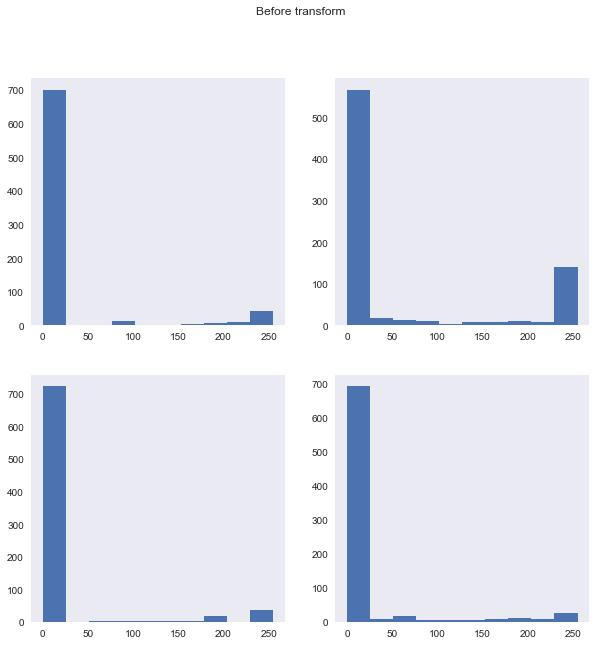

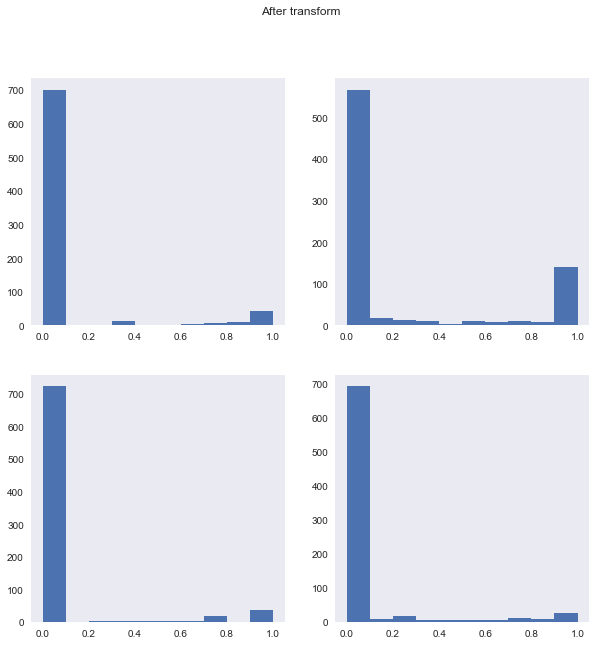

In [4]:
# Understand more on the data
print("Check the label of training data:\n{}".format(target.value_counts(sort=True)))

# What about the actual pixel variables?
figure(figsize(10,10))
for digit_num in range(0,4):
    subplot(2,2,digit_num+1)
    plt.hist(train.iloc[digit_num])
    suptitle("Before transform")

# Normalize the training data
train /= 255

figure(figsize(10,10))
for digit_num in range(0,4):
    subplot(2,2,digit_num+1)
    plt.hist(train.iloc[digit_num])
    suptitle("After transform")

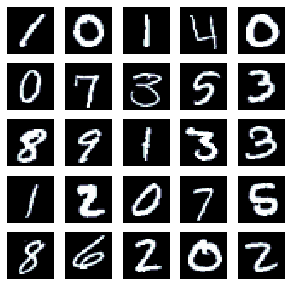

In [5]:
# Convert pixel from 784x1 (1 dimension) to 28x28 (2 dimensions)
figure(figsize(5,5))
for digit_num in range(0,25):
    subplot(5,5,digit_num+1)
    grid_data = train.iloc[digit_num].as_matrix().reshape(28,28) 
    plt.imshow(grid_data, interpolation = "none", cmap = "bone")
    xticks([])
    yticks([])

In [6]:
### Create function to evaluate the score of each classification model
def eval_model_classifier(model, data, target, split_ratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=split_ratio, random_state=0)
    model.fit(trainX, trainY)    
    return model.score(testX,testY)

In [7]:
### 1st round: RandomForestClassification

# Initialise values
num_estimators_array = np.array([1,5,10,50,100,200,500]) 
num_smpl = 10 # Test run the model according to samples_number
num_grid = len(num_estimators_array)
score_array_mu = np.zeros(num_grid) # Keep mean
score_array_sigma = np.zeros(num_grid) # Keep Standard deviation 
j=0

print("{}: RandomForestClassification Starts!".format(now()))
for n_estimators in num_estimators_array:
    score_array = np.zeros(num_smpl) # Initialize
    for i in range(0,num_smpl):
        rf_class = RandomForestClassifier(n_estimators = n_estimators, n_jobs=1, criterion="gini")
        score_array[i] = eval_model_classifier(rf_class, train.iloc[0:1000], target.iloc[0:1000], 0.8)
        print("{}: Try {} with n_estimators = {} and score = {}".format(now(), i, n_estimators, score_array[i]))
    score_array_mu[j], score_array_sigma[j] = mean(score_array), std(score_array)
    j=j+1

print("{}: RandomForestClassification Done!".format(now()))

03/03/17 16:04:05: RandomForestClassification Starts!
03/03/17 16:04:05: Try 0 with n_estimators = 1 and score = 0.49
03/03/17 16:04:05: Try 1 with n_estimators = 1 and score = 0.58
03/03/17 16:04:05: Try 2 with n_estimators = 1 and score = 0.525
03/03/17 16:04:05: Try 3 with n_estimators = 1 and score = 0.51
03/03/17 16:04:05: Try 4 with n_estimators = 1 and score = 0.59
03/03/17 16:04:05: Try 5 with n_estimators = 1 and score = 0.565
03/03/17 16:04:05: Try 6 with n_estimators = 1 and score = 0.475
03/03/17 16:04:05: Try 7 with n_estimators = 1 and score = 0.57
03/03/17 16:04:05: Try 8 with n_estimators = 1 and score = 0.51
03/03/17 16:04:05: Try 9 with n_estimators = 1 and score = 0.48
03/03/17 16:04:05: Try 0 with n_estimators = 5 and score = 0.685
03/03/17 16:04:05: Try 1 with n_estimators = 5 and score = 0.73
03/03/17 16:04:05: Try 2 with n_estimators = 5 and score = 0.655
03/03/17 16:04:05: Try 3 with n_estimators = 5 and score = 0.655
03/03/17 16:04:05: Try 4 with n_estimators =

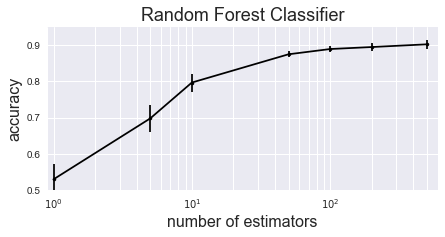

In [8]:
figure(figsize(7,3))
errorbar(num_estimators_array, score_array_mu, yerr=score_array_sigma, fmt='k.-')
xscale("log")
xlabel("number of estimators",size = 16)
ylabel("accuracy",size = 16)
xlim(0.9,600)
ylim(0.5,0.95)
title("Random Forest Classifier", size = 18)
grid(which="both")

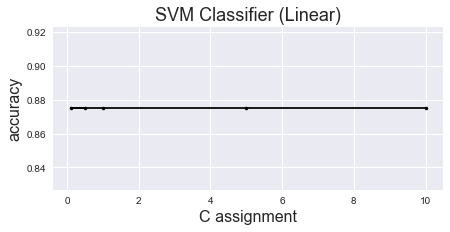

In [9]:

C_array = np.array([0.5, 0.1, 1, 5, 10])
score_array = np.zeros(len(C_array))
i=0
for C_val in C_array:
    svc_class = svm.SVC(kernel='linear', random_state=1, C = C_val)
    score_array[i] = eval_model_classifier(svc_class, train.iloc[0:1000], target.iloc[0:1000], 0.8)
    i=i+1

score_mu, score_sigma = mean(score_array), std(score_array)

figure(figsize(7,3))
errorbar(C_array, score_array, yerr=score_sigma, fmt='k.-')
xlabel("C assignment",size = 16)
ylabel("accuracy",size = 16)
title("SVM Classifier (Linear)", size = 18)
grid(which="both")

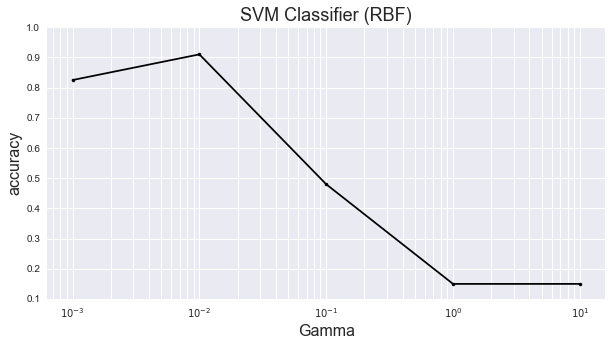

In [10]:
# Note: 
# Gamma: Kernel coefficient - the higher, it will try to exact fit to the training data, hence, can cause overfitting

gamma_array = np.array([0.001, 0.01, 0.1, 1, 10])
score_array = np.zeros(len(gamma_array))
score_mu = np.zeros(len(gamma_array))
score_sigma = np.zeros(len(gamma_array))
i=0
for gamma_val in gamma_array:
    svc_class = svm.SVC(kernel='rbf', random_state=1, gamma = gamma_val)
    score_array[i] = eval_model_classifier(svc_class, train.iloc[0:1000], target.iloc[0:1000], 0.8)
    score_mu[i], score_sigma[i] = mean(score_array[i]), std(score_array[i])
    i=i+1


figure(figsize(10,5))
errorbar(gamma_array, score_mu, yerr=score_sigma, fmt='k.-')
xscale('log')
xlabel("Gamma",size = 16)
ylabel("accuracy",size = 16)
ylim(0.1, 1)
title("SVM Classifier (RBF)", size = 18)
grid(which="both")

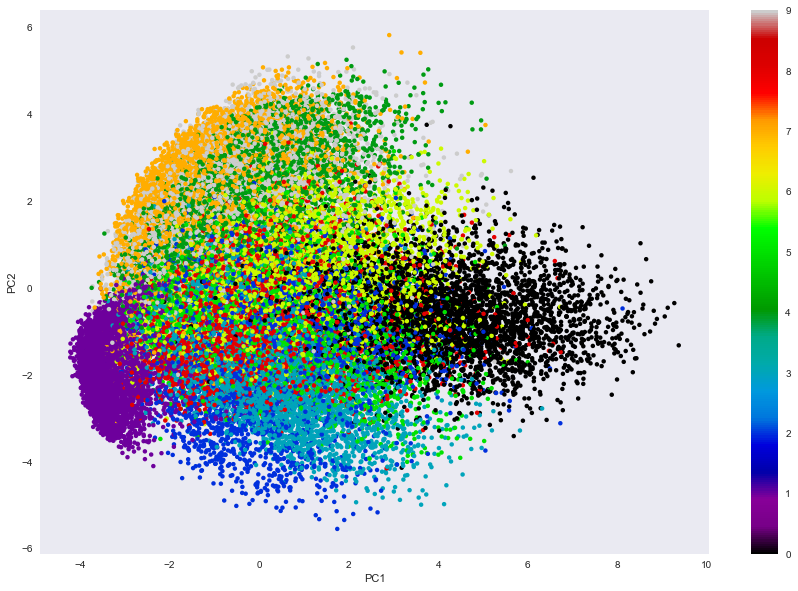

In [11]:
# Some PCA

pca = PCA(n_components=16)
pca.fit(train)
transform = pca.transform(train)

figure(figsize(15,10))
plt.scatter(transform[:,0],transform[:,1], s=20, c = target, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
clim(0,9)

xlabel("PC1")
ylabel("PC2")

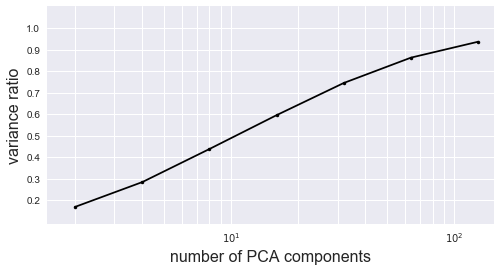

In [12]:
n_components_array= np.array([2, 4, 8, 16, 32, 64, 128])
vr = np.zeros(len(n_components_array))

i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(train)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1 

figure(figsize(8,4))
plot(n_components_array,vr,'k.-')
xscale("log")
ylim(9e-2,1.1)
yticks(linspace(0.2,1.0,9))
xlim(1.5, 150)
grid(which="both")
xlabel("number of PCA components",size=16)
ylabel("variance ratio",size=16)

In [27]:
# K-nearest
n_neighbors_array = range(2,20)
weight_array = ['uniform','distance']
score_array = np.zeros(len(n_neighbors_array))

for weight in weight_array:
    i=0
    for n in n_neighbors_array:
        nbrs = KNeighborsClassifier(n_neighbors=n, weights=weight)
        score_array[i] = eval_model_classifier(nbrs, transform, target, 0.8)
        print("{}: for n_neighbors = {} and weight ={} produces score = {}".format(now(), n, weight, score_array[i]))
        i+=1

print("Done")

03/03/17 16:24:59: for n_neighbors = 2 and weight =uniform produces score = 0.9508333333333333
03/03/17 16:25:03: for n_neighbors = 3 and weight =uniform produces score = 0.96
03/03/17 16:25:08: for n_neighbors = 4 and weight =uniform produces score = 0.9607142857142857
03/03/17 16:25:13: for n_neighbors = 5 and weight =uniform produces score = 0.9603571428571429
03/03/17 16:25:19: for n_neighbors = 6 and weight =uniform produces score = 0.9592857142857143
03/03/17 16:25:25: for n_neighbors = 7 and weight =uniform produces score = 0.9591666666666666
03/03/17 16:25:31: for n_neighbors = 8 and weight =uniform produces score = 0.9582142857142857
03/03/17 16:25:37: for n_neighbors = 9 and weight =uniform produces score = 0.958452380952381
03/03/17 16:25:44: for n_neighbors = 10 and weight =uniform produces score = 0.9576190476190476
03/03/17 16:25:50: for n_neighbors = 11 and weight =uniform produces score = 0.9570238095238095
03/03/17 16:25:57: for n_neighbors = 12 and weight =uniform pro

In [41]:
# Train all model using testing data

pca = PCA(n_components=32)
pca.fit(train, target)
transform = pca.transform(train)

KNNmodel = KNeighborsClassifier(n_neighbors=4, weights='distance').fit(transform, target)
print(KNNmodel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')


In [45]:
test = pd.read_csv("test.csv")
test /=255

In [46]:
test_transform = pca.transform(test)

In [47]:
y_pred = KNNmodel.predict(test_transform)

In [55]:
print(y_pred[0:25,])

[2 0 9 0 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7]


In [56]:
test['Label'] = pd.Series(y_pred)
test['ImageId'] = test.index +1
sub = test[['ImageId', 'Label']]
print(test['Label'].value_counts(sort=True))

1    3233
7    2906
9    2805
2    2805
0    2779
6    2762
4    2741
3    2729
8    2700
5    2540
Name: Label, dtype: int64


In [57]:
sub.to_csv('submission_knn.csv', index=False)